# Options
There are many options which can be passed into `ds.find_DSp(vn, opt = opt)` and `ds.plot(vn, opt = opt)`. They can be categorised into two: plotting options and identification options. Plotting options refers to cosmetic options in producing the figures, while identification options entails specifications on the design space identification method.

The default value of all options can be accessed by calling `ds.default_opt`. At the end of this page, there is an example of using the options.

## Identification options
Here we show the main options which can be used for the identification of the design space and their default values. These options can be passed when calling `ds.find_DSp(vn, opt = opt)` where `opt` is a dictionary of the option and their values.
```
# ----- Hull Parameters ----- #
'no_splits': 10,    # splits for alpha shape calculation
                    # for large memory problems use more splits
'a': None,          # Alpha value -> at large alpha,
                    # hull becomes convex
                    # if None: use product of bounds range
'amul': 1,          # Alpha multiplier value (wrt to a used)
'opt_amul': True,   # If True, use bisection to find 
                    # largest amul with no vio in DSp
'extra_points': [], # Extra points to be used for identification
'maxiter': 50,      # Maximum bisection iterations
'tol': 0.001,       # Bisection tolerance (on the DI which is amul)
'lb': 0.001,        # Lower bound of initial bisection run
'ub': 5,            # Upper bound of initial bisection run
'printF': True,     # If true, print iter details
'maxvp': 0,         # Maximum allowed fractions of vio in DSp
```

## Plotting options
Here we show the cosmetic options for creating the figures. These options can be passed when calling `ds.plot(vn, opt = opt)` where `opt` is a dictionary of the option and their values.

### General options
```
# ----- Labels ----- #
'xlabel': 'x',          # x axis label
'ylabel': 'y',          # y axis label
'zlabel': 'z',          # z axis label
'labelpad': [8, 8, 8],  # Label padding
'cmap': 'inferno80',    # Matplotlib colour map
'hmv': 'None',          # heat map variable name
'hmvlabel': 'hmvlabel: heat map var label', # heat map variable label

# ----- Hidden Elements ----- #
'hidehmv': False, # If True, no heat map will be plotted
'hidesat': False, # If True, no satisfied variables will be plotted
'hidevio': False, # If True, no violated variables will be plotted
'hidedsp': False, # If True, hides the surface/boundary

# ----- Plot Format ----- #
'czorder': False,     # computed_zorder for 3D plots settings
'fs': (6, 4),         # Figure size
'bw': False,          # If True, use black-white template
'alpha': 1,           # Transparency of points
'font_size': 14,      # Font size
# Color bar and map
'cbarloc': 'right',   # Colobar location
'cbaror': 'vertical', # Colorbar orientation
'cbarpad': 0.12,      # Colorbar padding
'cbarshrink': 1.0,    # size of the colorbar
'cbarfraction': 0.15, # fraction of original axes to use for colorbar
'mycmap': 'viridis',  # Use your own cmap (input name of cmap as str)
'cmapmax': None,       # max colorbar scale
'cmapmin': None,       # min colorbar scale
'cmapext': 'neither',  # if extended cbar is desired
'cmapextmax': 'red',   # color of the "over max values"
'cmapextmin': 'green', # color of the "under min values"
# Satisfied samples
'satlabel': 'Sat',     # Satisfied samples label
'satcolor': '#FF9000', # Satisfied samples color
'satmarker': '.',      # Marker of satisfied points
'satmarkersize': 20,   # Marker size of violated points
'satfill': '#FF9000',  # Marker fill color of satisfied points
'satzorder': 5,        # Decides which level to be plotted on
# Violated samples
'violabel': 'Vio',     # Violated samples label
'viocolor': '#005DC1', # Violated samples color
'viomarker': '.',      # Marker of violated points
'viomarkersize': 20,   # Marker size of violated points
'viofill': '#005DC1',  # Marker fill color of violated points
'viozorder': 5,        # Decides which level to be plotted on
# Legend
'legloc': 'upper right', # Legend location
'framealpha': 1,         # Legend box transparency
'legendzorder': 100,     # Decides which level to be plotted on
# 3D view
'elev': 20,              # Elevation of 3D plot
'azim': -70,             # Azimuth of 3D plot
# Axes limit
'limfactor': 0.05,       # Axes limit factor based on range of axes
'axeslimdf': 'df',       # Data used to calculate axes limits 
                         # ('sat', 'vio', 'df', or 'best')
```

### Design Space plotting options
```
# ----- Design Space Parameters ----- #
'dsplabel': 'DSp',   # Label of surface/boundary
'dspcolor': 'black', # Color of the surface/boundary (both)
'dspwidth': 4,       # Thickness of the boundary (2D)
'dspstyle': '-',     # Line style of the boundary (2D)
'dspalpha': 0.2,     # Transparency of surface/boundary (3D)
'dspzorder': 20,     # To make sure it is plotted ontop of the samples
```

### Nominal Operating Point plotting options
```
# ----- NOP Parameters ----- #
'step_change': 1,    # Step change of expanding AOR in percent
'noplabel': 'NOP',   # Normal Operating Point label for legend
'nopmarker': 'x',    # Nominal operating point marker style
'nopwidth':   4,     # Nominal operating point marker thickness
'nopcolor': 'black', # Nominal operating point marker color
'nopsize':  150,     # Nominal operating point marker size
'nopzorder': 10,     # To make sure it is plotted ontop of the samples
```

### Acceptable Operating Region plotting options
```
# ----- AOR Parameters ----- #
'aorlabel': 'AOR',   # Uniform Proven Acceptable Range
'aorstyle': '--',    # AOR boundary line style
'aorcolor': 'black', # AOR boundary line color
'aorwidth': 4,       # AOR boundary line width
'aorzorder': 10,     # To make sure it is plotted ontop of the samples
'AORlb': 0,          # Bisection params (lower bound)
'AORub': 1,          # Bisection params (upper bound)
'AORtol': 0.001,     # Bisection params - tolerance
'AORmaxiter': 50,    # Bisection params - max iterations
'AORprintF': False,  # Print bisection output
```

## Options Example
Here we consider the 3D problem from before and apply some of the options that have been mentioned above.

In [1]:
# Imports
from dside import DSI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----- Generate Inputs ----- #
def Sobol_sequence(lbd, ubd, power_no):
    """
    Create 2^power_no of inputs for sampling based on the lists
    of lbd (lower bound) and ubd (upper bound).
    """
    from scipy.stats import qmc
    sampler = qmc.Sobol(d = len(lbd), scramble = False)
    inputs = sampler.random_base2(m = power_no)
    inputs = qmc.scale(inputs, lbd, ubd)
    return inputs

# Preparing example dataset
DI1_bounds    = [0, 1]
DI2_bounds    = [0, 1]
DI3_bounds    = [0, 1]

lbd = [DI1_bounds[0], DI2_bounds[0], DI3_bounds[0]]
ubd = [DI1_bounds[1], DI2_bounds[1], DI3_bounds[1]]

# Use Sobol sequence to generate inputs
pwr = 10
inputs = Sobol_sequence(lbd, ubd, pwr)
DI1 = inputs[:, 0]
DI2 = inputs[:, 1]
DI3 = inputs[:, 2]

# ----- Create Outputs and dataframe ----- #
KPI1 = DI1*10 + 5*DI2**4
KPI2 = DI1*10 - 5*DI2**4 + 2.5*DI3**4

d = np.array([DI1, DI2, DI3, KPI1, KPI2]).T
l = ['DI1', 'DI2', 'DI3', 'KPI1', 'KPI2']
data = pd.DataFrame(d, columns = l)
print(data.head(5))

     DI1    DI2    DI3      KPI1      KPI2
0  0.000  0.000  0.000  0.000000  0.000000
1  0.500  0.500  0.500  5.312500  4.843750
2  0.750  0.250  0.250  7.519531  7.490234
3  0.250  0.750  0.750  4.082031  1.708984
4  0.375  0.375  0.625  3.848877  4.032593


Bisection search for alpha multiplier (radius)
    tol: 1.000e-03  maxiter: 50
    lb:  1.000e-03  ub:      5.000e+00
____________________________________________________
 No iter  |  alpha multiplier  |   Violation Flag   
____________________________________________________
    1     |     2.500e+00      |        True        
    2     |     1.251e+00      |        True        
    3     |     6.259e-01      |       False        
    4     |     9.383e-01      |       False        
    5     |     1.095e+00      |        True        
    6     |     1.016e+00      |        True        
    7     |     9.774e-01      |        True        
    8     |     9.578e-01      |       False        
    9     |     9.676e-01      |       False        
    10    |     9.725e-01      |        True        
    11    |     9.700e-01      |        True        
    12    |     9.688e-01      |       False        
    13    |     9.694e-01      |        True        
    14    |     9.691e-01      |  

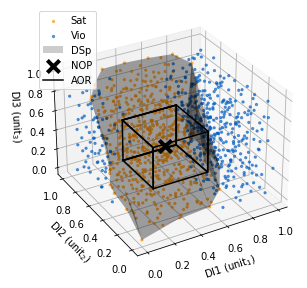

In [2]:
# Setup problem definitions
vn = ['DI1', 'DI2', 'DI3']
constraints = {'KPI1': [0, 20], 'KPI2': [0, 6]}

# Set the options
opt = {
    # Identification options
    'no_splits': 1, # splits for alpha shape calculation
                    # for large memory problems use more splits
    'printF': True, # print iteration details
    'maxvp': 0.1,   # maximum allowed violations in DSp (fraction)
    # Labels
    'xlabel': 'DI1 (unit$_\mathrm{1}$)', # x axis label
    'ylabel': 'DI2 (unit$_\mathrm{2}$)', # y axis label
    'zlabel': 'DI3 (unit$_\mathrm{3}$)', # z axis label
    # Plot format
    'alpha': 0.6,           # transparency of points
    'legloc': 'upper left', # legend location
    'framealpha': 0.8,      # legend box transparency
    # 3D view
    'elev': 30,    # elevation of 3D plot
    'azim': -120,  # azimuth of 3D plot
    # Heat map
    'hmv': 'KPI1',      # heat map variable
    'hmvlabel': 'KPI1', # color bar label
}

# Initialize the design space entity
ds = DSI(data)
# Apply the constraints separating the satisfied and violated points
ds.screen(constraints)
# Finding the design space (alpha shape)
ds.find_DSp(vn, opt = opt)
# Plot the design space
ds.plot(vn, opt = opt)
# Identify acceptable operating region (AOR)
x = [0.4, 0.4, 0.5]
ds.find_AOR(x)

## Matplotlib elements override
The matplotlib `fig` and `ax` entity is saved in the `ds` class whenever we call `ds.plot`. This allows for the customisation of the figure as like a normal matplotlib figure.

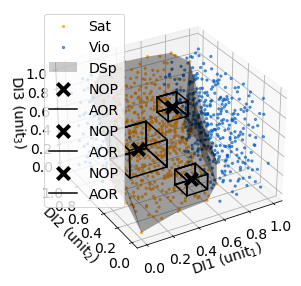

In [3]:
# Multiple AOR in one plot
ds.plot(vn, opt)
ds.find_AOR([0.2, 0.4, 0.5]) # AOR 1
ds.find_AOR([0.7, 0.8, 0.5]) # AOR 2
ds.find_AOR([0.5, 0.2, 0.2]) # AOR 3
plt.show()

Now let's customise the plot more. We can change the colormap used, change tick values, add custom legend, and add some annotations to the figure and legend for our acceptable operating region and nominal operating points.

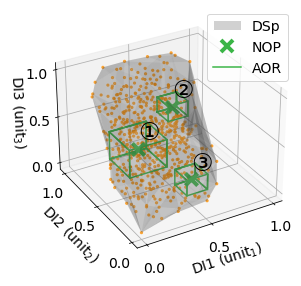

In [4]:
# Apply different colormap
from matplotlib.colors import ListedColormap
mycmap = plt.cm.get_cmap('Oranges', 256)
mycmap = ListedColormap(mycmap(np.linspace(0.1, 1, 256)))
NOPAORcolor = '#3ab546'
opt.update({ # Update options dictionary
    'hidedsp': False, 'dspcolor': 'gray', 'hidehmv': False,
    'hidevio': True, 'cbarloc': 'right', 'cbaror': 'vertical',
    'mycmap': mycmap, 'aorcolor': NOPAORcolor, 'dspalpha': 0.2,
    'nopcolor': NOPAORcolor, 'alpha': 0.7, 'cbarpad': 0.03
    })

# Multiple AOR in one plot
ds.plot(vn, opt)
ds.find_AOR([0.2, 0.4, 0.5]) # AOR 1
ds.find_AOR([0.7, 0.8, 0.5]) # AOR 2
ds.find_AOR([0.5, 0.2, 0.2]) # AOR 3
ax = ds.ax # extract ax from ds
# Use custom tick values
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_zticks([0, 0.5, 1])

# Adding custom legend entries
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [
    Patch(facecolor = '#d1d1d1', edgecolor = 'w', label = 'DSp'),
    Line2D([0], [0], marker='x', color = NOPAORcolor, label='NOP',\
        markerfacecolor='#FF9000', markersize=12, linewidth = 0,\
        markeredgewidth=4), 
    Line2D([0], [0], color = NOPAORcolor, label='AOR'),
    ]
plt.legend(handles = legend_elements, loc = 'upper right')

# Add annotations
ax.text(0.2, 0.4, 0.6, '①', color='black', size=24, zorder = 200)
ax.text(0.7, 0.8, 0.6, '②', color='black', size=24, zorder = 200)
ax.text(0.5, 0.2, 0.3, '③', color='black', size=24, zorder = 200)
# plt.show()
ax = ds.ax
ax.set_facecolor('white')
plt.savefig('3D.svg', bbox_inches='tight')

As shown, the package is able to visualise design space and acceptable operating regions with extensive customisability using the familiar matplotlib package.